<a href="https://colab.research.google.com/github/sudeepmathew/Voc-Analysis/blob/master/Sentiment_Analysis_for_Topic_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting Data

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# Importing Packages

In [0]:
import pandas as pd
import nltk
from nltk import FreqDist
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
nltk.download('wordnet') 
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()
stem = PorterStemmer()
word = "inversely"
print("stemming:",stem.stem(word))
print("lemmatization:", lem.lemmatize(word, "v"))

# Libraries for text preprocessing
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer
#import nessassary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import nltk
from nltk import FreqDist
import spacy

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
stemming: invers
lemmatization: inversely
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [0]:
data_2 = pd.read_csv("/content/drive/My Drive/file_new1.csv")

In [0]:
data_2.shape

(286, 3)

In [0]:
data_2.head()

,Unnamed: 0,Reviews,Topic
0,2,blackwasp thanks automobile encyclopedia sendi...,1
1,8,mg woo indian gun blazing check video http you...,1
2,10,pretty neat promotion aired mgi liked showing ...,1
3,15,spotted hector bannerghatta road yesterday,1
4,16,mg hector available subscription myles source ...,1


In [0]:
##Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))
##Creating a list of custom stopwords
new_words = ["using", "show", "result", "large", "also", "iv", "one", "two", "get","like","think","new","much",
             "https", "previously", "shown","quote","originally","posted","post","owner","youtube","www","http","would"]
stop_words = stop_words.union(new_words)

# Creating Corpus

In [0]:
corpus = []
for i in range(0, 286):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', data_2['Reviews'][i])
    
    #Convert to lowercase
    #text = text.lower()
    
    #remove tags
    #text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    #text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    #ps=PorterStemmer()
    #Lemmatisation
    #lem = WordNetLemmatizer()
    text = [word for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus.append(text)

# Creating Bag of Words

In [0]:
bagofwords = []
for i in range (0,286):
  words =corpus[i].split()
  bagofwords.append(words)

In [0]:
#printing bag of word of 100th item in the list
print(bagofwords[100])

['word', 'sa', 'mg', 'safdarjung', 'probability', 'booking', 'slated', 'reopen', 'navratras', 'since', 'auspicious', 'period', 'people', 'make', 'purchase', 'heavy', 'demand', 'petrol', 'auto', 'followed', 'diesel', 'mt', 'hybrid', 'despatched', 'car', 'last', 'month', 'around', 'petrol', 'dct', 'delhi', 'folk', 'preferring', 'automatic', 'obvious', 'reason']


# Sentiment Analysis for Topic # 2

In [0]:
from textblob import TextBlob
sentiment_text=[TextBlob(review) for review in corpus]
print(sentiment_text[0].polarity)
print(sentiment_text[0])

0.008750000000000013
blackwasp thanks automobile encyclopedia sending image heartfelt gratitude sharing enthusiast via team bhp page attachment seems huge rear overhang alturas thing hate car make look bus simply understand replace h v call vector mean seriously sound awkward conversation guy hey man bought guy great guy hector guy hector guy hector mg hector guy stare dude face second awkwardness pretend understand talking


In [0]:
sentiments = [[review.sentiment.polarity,str(review)] for review in sentiment_text]
sentiment_df = pd.DataFrame(sentiments, columns=['polarity','review'])
sentiment_df.sort_values(by='polarity',ascending=False)

,polarity,review
245,0.600000,saw flesh huge road presence great alternative...
73,0.600000,saw flesh huge road presence great alternative...
14,0.500000,thought came mind reading sure voice command s...
233,0.500000,started spotting fewof road delhi ncr glad wen...
61,0.500000,started spotting fewof road delhi ncr glad wen...
...,...,...
251,-0.277778,sebring leather coming steering opened found s...
203,-0.305556,wheelguy mg hector group powered tailgate fail...
176,-0.325000,afraid whether board front service center soon...
206,-0.400000,finally mg xuv way creating artificial shortag...


# Sentiment Distrinbution for Topic # 2

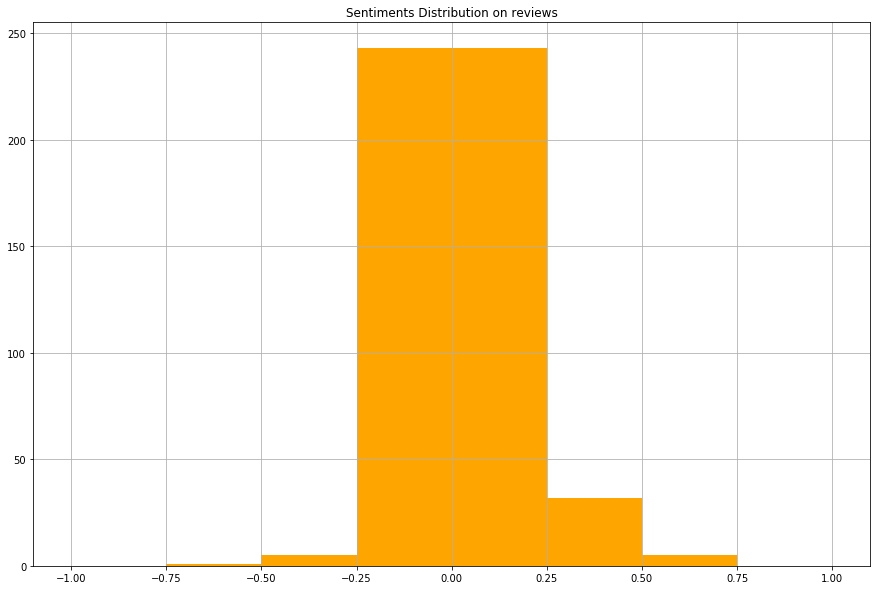

In [0]:
fig,ax = plt.subplots(figsize=(15,10))
sentiment_df.hist(bins=[-1,-0.75,-0.5,-0.25,0.25,0.5,0.75,1], ax=ax, color='orange')
plt.title('Sentiments Distribution on reviews')
plt.show()

In [0]:
sentiment_df.to_csv('sent_file1.csv') 